<a href="https://colab.research.google.com/github/GabrielFePL/Machine-Learning-Fatec-Matao/blob/main/NeuralNetworkImplementation_Class_06_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning - Fatec Matão

## Pré-Processamento de Dados

### Importação de Bibliotecas

* O pandas é uma biblioteca do Python usada para manipulação e análise de dados, oferecendo estruturas como DataFrame e Series para organizar, filtrar, transformar e visualizar dados de forma eficiente. Documentação: https://pandas.pydata.org/docs/

* O NumPy é uma biblioteca do Python para cálculos numéricos, oferecendo arrays multidimensionais eficientes e funções matemáticas otimizadas para operações científicas e estatísticas. Documentação: https://numpy.org/doc/

* O Seaborn é uma biblioteca do Python para visualização de dados, baseada no Matplotlib, que facilita a criação de gráficos estatísticos elegantes e informativos com menos código. Documentação: https://seaborn.pydata.org/

* O matplotlib.pyplot é um módulo do Matplotlib que permite criar gráficos estáticos, interativos e personalizados em Python, sendo amplamente usado para visualização de dados. Documentação: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html

* O plotly.express é uma biblioteca do Python para criar gráficos interativos e dinâmicos de forma simples, permitindo visualizações ricas e personalizáveis com poucos comandos. Documentação: https://plotly.com/python-api-reference/plotly.express.html

* O sklearn.preprocessing.StandardScaler é uma ferramenta do Scikit-learn para padronizar dados, centralizando a média em 0 e a variância em 1. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

* O sklearn.model_selection.train_test_split é uma função do Scikit-learn para dividir conjuntos de dados em treinos e testes de forma aleatória. Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

* O pickle é um módulo do Python para serialização e desserialização de objetos Python, permitindo salvar e carregar modelos treinados. Documentação: https://docs.python.org/pt-br/dev/library/pickle.html

In [45]:
!pip install plotly --upgrade
!pip install Orange3==3.36.2

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
import pickle
import Orange
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.neural_network import MLPClassifier

### Carregamento de Datasets

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Credit Rules Dataset

In [48]:
credit_data_table = Orange.data.Table('/content/drive/MyDrive/machine_learning_semestre_5/credit_data_regras.csv')
credit_data_table

[[66155.9, 59.017, 8106.53 | 0],
 [34415.2, 48.1172, 6564.75 | 0],
 [57317.2, 63.108, 8020.95 | 0],
 [42709.5, 45.752, 6103.64 | 0],
 [66952.7, 18.5843, 8770.1 | 1],
 ...
]

In [49]:
credit_data_table.domain

[income, age, loan | default]

#### Census Pickle Dataset

In [50]:
with open('/content/drive/MyDrive/machine_learning_semestre_5/Pickle/census.pkl', 'rb') as f:
  x_census_train, x_census_test, y_census_train, y_census_test = pickle.load(f)

In [51]:
x_census_train.shape, y_census_train.shape

((24420, 108), (24420,))

In [52]:
x_census_test.shape, y_census_test.shape

((8141, 108), (8141,))

### Credit Pickle Dataset

In [70]:
with open('/content/drive/MyDrive/machine_learning_semestre_5/Pickle/credit.pkl', 'rb') as f:
  x_credit_train, x_credit_test, y_credit_train, y_credit_test = pickle.load(f)

In [71]:
x_credit_train, x_credit_test

(array([[-1.3754462 ,  0.50630999,  0.10980934],
        [ 1.45826409, -1.64894017, -1.21501497],
        [-0.79356829,  0.22531104, -0.43370226],
        ...,
        [ 0.21738243, -0.14704491,  1.40872498],
        [ 0.58716195,  0.66435405,  0.67948086],
        [ 0.68315357,  0.04084859,  1.91819744]]),
 array([[ 1.59301567, -1.35435933,  2.58262733],
        [ 0.99769755,  0.99806485,  0.84418709],
        [-0.42485257,  0.55812535, -1.15785286],
        ...,
        [ 1.37445674, -1.05746369, -1.12564819],
        [-1.57087737, -0.6348826 , -0.36981671],
        [-1.03572293, -0.93978209,  0.04244312]]))

In [72]:
y_credit_train, y_credit_test

(array([0, 0, 0, ..., 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
     

### Amostragem

In [53]:
credit_data_sample = Orange.evaluation.testing.sample(credit_data_table, n=0.25)

In [54]:
credit_data_sample[0]
credit_data_sample[1]

[[23120.9, 40.2967, 1417.85 | 0],
 [35108.6, 40.7434, 4002.99 | 0],
 [27135.1, 54.8365, 1387.25 | 0],
 [55320.8, 29.4172, 5990.72 | 0],
 [23985.1, 24.4328, 2284.21 | 0],
 ...
]

In [55]:
train_credit_data_sample = credit_data_sample[1]
test_credit_data_sample = credit_data_sample[0]

In [56]:
len(train_credit_data_sample), len(test_credit_data_sample)

(1500, 500)

## Implementação de Algoritmos de Aprendizagem de Máquina

### Ingestão e Treinamento Neural Modelo

#### CN2

In [57]:
cn2_credit = Orange.classification.rules.CN2Learner()
credit_rules = cn2_credit(train_credit_data_sample)

In [58]:
for rule in credit_rules.rule_list:
  print(rule)

IF age>=34.9126990740187 THEN default=0 
IF income>=69695.1504494064 THEN default=1 
IF age>=34.7514377613552 THEN default=1 
IF loan<=2495.13299137587 AND income>=20145.9885970689 THEN default=0 
IF income<=31702.3342987522 AND age>=34.7410444347188 THEN default=0 
IF income<=31702.3342987522 AND loan>=3682.8619314122707 THEN default=1 
IF loan>=7513.18286435755 AND age>=18.3097456344403 THEN default=1 
IF income>=57596.3540980592 THEN default=0 
IF loan>=5862.83302915672 AND age>=29.4230185477063 THEN default=1 
IF loan>=6016.61509078929 AND age>=23.1489815721288 THEN default=1 
IF age>=34.669146894011604 THEN default=1 
IF age>=33.9493660898879 THEN default=0 
IF age>=33.6895613595843 THEN default=1 
IF loan>=6525.21842259918 THEN default=1 
IF income>=48790.1324336417 THEN default=0 
IF income<=22089.8374845274 AND age>=21.3656869572587 THEN default=1 
IF loan>=4849.33378471958 AND loan>=5785.88427485782 THEN default=1 
IF income>=45311.831838917 THEN default=0 
IF loan>=4849.33378

#### KNN

In [59]:
knn_census = KNeighborsClassifier(n_neighbors=10,)
knn_census.fit(x_census_train, y_census_train)

KNeighborsClassifier(n_neighbors=10)

#### Neural Network Credit

In [73]:
neural_network_credit = MLPClassifier(verbose=True, max_iter=1500, tol=0.000010, solver='adam', activation='relu', hidden_layer_sizes=(20,20))
neural_network_credit.fit(x_credit_train, y_credit_train)

Iteration 1, loss = 0.80572932
Iteration 2, loss = 0.73385981
Iteration 3, loss = 0.67277138
Iteration 4, loss = 0.62078156
Iteration 5, loss = 0.57225349
Iteration 6, loss = 0.52783769
Iteration 7, loss = 0.48417979
Iteration 8, loss = 0.44124426
Iteration 9, loss = 0.40071857
Iteration 10, loss = 0.36260283
Iteration 11, loss = 0.32829525
Iteration 12, loss = 0.29694773
Iteration 13, loss = 0.26894971
Iteration 14, loss = 0.24453685
Iteration 15, loss = 0.22307724
Iteration 16, loss = 0.20491914
Iteration 17, loss = 0.18909274
Iteration 18, loss = 0.17534273
Iteration 19, loss = 0.16339282
Iteration 20, loss = 0.15287603
Iteration 21, loss = 0.14375618
Iteration 22, loss = 0.13570062
Iteration 23, loss = 0.12863109
Iteration 24, loss = 0.12235413
Iteration 25, loss = 0.11697329
Iteration 26, loss = 0.11205068
Iteration 27, loss = 0.10770689
Iteration 28, loss = 0.10370468
Iteration 29, loss = 0.10019455
Iteration 30, loss = 0.09684793
Iteration 31, loss = 0.09418753
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=1500, tol=1e-05,
              verbose=True)

#### Neural Network Census

In [78]:
neural_network_census = MLPClassifier(verbose=True, max_iter=20000, tol=0.000010, solver='adam', activation='relu', hidden_layer_sizes=(55,55))
neural_network_census.fit(x_census_train, y_census_train)

Iteration 1, loss = 0.43263286
Iteration 2, loss = 0.33407109
Iteration 3, loss = 0.32000080
Iteration 4, loss = 0.31158917
Iteration 5, loss = 0.30543072
Iteration 6, loss = 0.30189302
Iteration 7, loss = 0.29863885
Iteration 8, loss = 0.29503892
Iteration 9, loss = 0.29279974
Iteration 10, loss = 0.29228005
Iteration 11, loss = 0.28800887
Iteration 12, loss = 0.28560749
Iteration 13, loss = 0.28428645
Iteration 14, loss = 0.28155401
Iteration 15, loss = 0.28076062
Iteration 16, loss = 0.27854175
Iteration 17, loss = 0.27735748
Iteration 18, loss = 0.27559252
Iteration 19, loss = 0.27400473
Iteration 20, loss = 0.27228781
Iteration 21, loss = 0.26993229
Iteration 22, loss = 0.26950867
Iteration 23, loss = 0.26782937
Iteration 24, loss = 0.26622891
Iteration 25, loss = 0.26455220
Iteration 26, loss = 0.26396182
Iteration 27, loss = 0.26153178
Iteration 28, loss = 0.26007394
Iteration 29, loss = 0.25860553
Iteration 30, loss = 0.25742658
Iteration 31, loss = 0.25598756
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=20000, tol=1e-05,
              verbose=True)

### Avaliação Neural

#### CN2

In [60]:
rules_predictors = Orange.evaluation.testing.TestOnTestData(train_credit_data_sample, test_credit_data_sample, [lambda test_data: credit_rules])

In [61]:
Orange.evaluation.CA(rules_predictors)

array([0.972])

#### KNN

In [62]:
knn_predictors = knn_census.predict(x_census_test)

In [63]:
accuracy_score(y_census_test, knn_predictors)

0.8301191499815748

0.8301191499815748

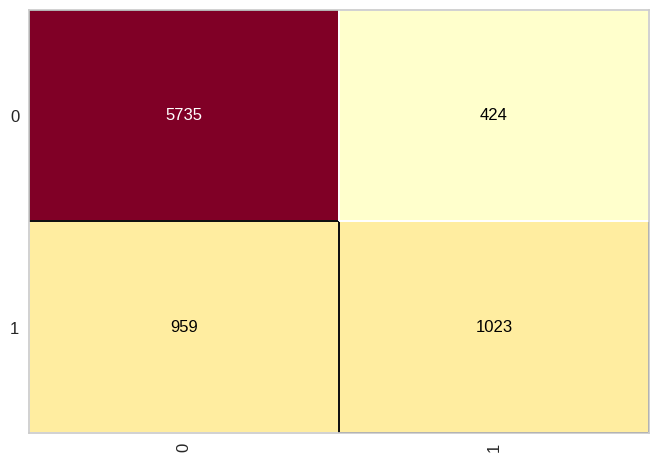

In [64]:
knn_confusion_matrix = ConfusionMatrix(knn_census)
knn_confusion_matrix.fit(x_census_train, y_census_train)
knn_confusion_matrix.score(x_census_test, y_census_test)

In [65]:
print(classification_report(y_census_test, knn_predictors))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6159
           1       0.71      0.52      0.60      1982

    accuracy                           0.83      8141
   macro avg       0.78      0.72      0.74      8141
weighted avg       0.82      0.83      0.82      8141



#### Neural Network Credit

In [79]:
nn_credit_predictors = neural_network_credit.predict(x_credit_test)
nn_credit_predictors

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [80]:
nn_credit_accuracy = accuracy_score(y_credit_test, nn_credit_predictors)
nn_credit_accuracy

0.996

#### Neural Network Census

In [82]:
nn_census_predictors = neural_network_census.predict(x_census_test)
nn_census_predictors

array([0, 0, 0, ..., 0, 1, 0])

In [83]:
nn_census_accuracy = accuracy_score(y_census_test, nn_census_predictors)
nn_census_accuracy

0.8218892028006387